In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import sys
sys.path.append(b3d.get_root_path())

In [3]:
import jax.numpy as jnp
import rerun as rr

In [4]:
from tests.dense_model_unit_tests.triangle_depth_posterior.task import TrianglePosteriorGridApproximationTask
from tests.dense_model_unit_tests.triangle_depth_posterior.solver.importance import ImportanceSolver

In [5]:
task_specs = [
    (background_color, triangle_color)
    for background_color in [jnp.array([1., 1., 1.]), jnp.array([0., 0., 0.])]
    for triangle_color in [jnp.array([1., 0., 0.]), jnp.array([0., 1., 0.])]
]

In [6]:
task = TrianglePosteriorGridApproximationTask.default_scene_using_colors(*task_specs[0])

In [7]:
rr.init("triangle_posterior_test-5")
rr.connect("127.0.0.1:8812")
task.visualize_task()

In [8]:
solver = ImportanceSolver()
task_spec = task.get_task_specification()
solution = solver.solve(task_spec)

In [9]:
metrics = task.score(solution)

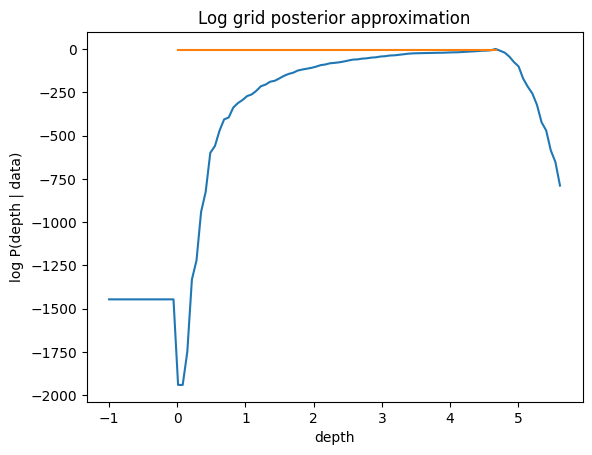

In [10]:
task.visualize_solution(solution, metrics)

In [11]:
solver.visualize_solver_state()